### NUWECASH DATA SCIENCE

In [3]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("./J2D_train.csv")
df.head()

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00,14799.0,NaN,regular,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00
3,11322,50.0,approved,2020-08-07 11:01:30.51934+00,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16105 entries, 0 to 16104
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16105 non-null  int64  
 1   amount           16105 non-null  float64
 2   status           16105 non-null  object 
 3   created_at       16105 non-null  object 
 4   user_id          14218 non-null  float64
 5   money_back_date  9498 non-null   object 
 6   transfer_type    16105 non-null  object 
 7   send_at          8776 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1006.7+ KB


In [44]:
df.describe()

,id,amount,user_id
count,16105.000000,16105.000000,14218.000000
mean,9577.939770,87.722384,19328.963075
std,5495.677337,22.546287,13770.497673
min,3.000000,1.000000,34.000000
25%,4614.000000,80.000000,8074.000000
50%,9937.000000,100.000000,17029.500000
75%,14369.000000,100.000000,29726.500000
max,18614.000000,200.000000,57362.000000


In [45]:
# Parse Month ID for both created_at and send_at datetimes
df['created_at'] = pd.to_datetime(df['created_at'])
df['send_at'] = pd.to_datetime(df['send_at'])

minYear = int(min(df['created_at'].min().year, df['send_at'].min().year))

df.insert(4, column = 'created_at_month', value = df['created_at'].apply(lambda time: 12*(time.year - minYear) + time.month))
df.insert(9, column = 'send_at_month', value = df['send_at'].apply(lambda time: 12*(time.year - minYear) + time.month))
df

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0
...,...,...,...,...,...,...,...,...,...,...
16100,13302,100.0,rejected,2020-08-20 07:23:33.760027+00:00,20,29247.0,NaN,instant,2020-08-27 07:23:33.735377+00:00,20.0
16101,13710,100.0,rejected,2020-08-24 00:33:58.853099+00:00,20,NaN,NaN,instant,2020-08-31 00:33:58.824223+00:00,20.0
16102,1522,100.0,approved,2020-05-02 08:54:49.586739+00:00,17,2562.0,2020-06-13 00:16:39.223405+00,regular,NaT,NaN
16103,7153,100.0,rejected,2020-07-08 12:56:16.163418+00:00,19,NaN,NaN,regular,NaT,NaN


In [46]:
df.head()

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0


**Data Analysis**

The only matter is null users (no possible identification)

In [47]:
ullUsers = df.loc[df['user_id'].isnull()]
print(nullUsers.shape)
nullUsers

NameError: name 'nullUsers' is not defined

In [48]:
# Which of them have accepted transferences?
nullUsersWithTransference = nullUsers.loc[nullUsers['status'] == 'approved']
print(nullUsersWithTransference.shape)
nullUsersWithTransference.head()

NameError: name 'nullUsers' is not defined

In [49]:
# Is user id unique?
df['user_id'].value_counts()

3377.0     18
2142.0     18
13851.0    17
1159.0     16
15219.0    16
           ..
28233.0     1
163.0       1
49612.0     1
40083.0     1
13483.0     1
Name: user_id, Length: 6029, dtype: int64

**Preguntes**

1. Número de nuevos usarios por mes:

In [50]:
unique_users_month = dict()     # {month_id : set(unique_users) }
created_users_month = dict()    # {month_id : number of created users}

uniqueMonths = sorted(df['created_at_month'].unique()) # Unique Months list

for i in range(len(uniqueMonths)):

    currentMonth = uniqueMonths[i]
    lastMonth = uniqueMonths[i - 1]
    
    # Unique users per Month 
    unique_users_month[currentMonth] = set(df.loc[df['created_at_month'] == currentMonth, 'user_id'].dropna())

    # Compute how much created users are per month
    if i == 0: created_users_month[currentMonth] = len(unique_users_month[currentMonth])
    else: created_users_month[currentMonth] = len(unique_users_month[currentMonth] - unique_users_month[lastMonth])

print(created_users_month)

{11: 1, 12: 204, 13: 90, 14: 112, 15: 111, 16: 271, 17: 415, 18: 1410, 19: 1397, 20: 991, 21: 2110}


Text(0.5, 0, 'Month ID')

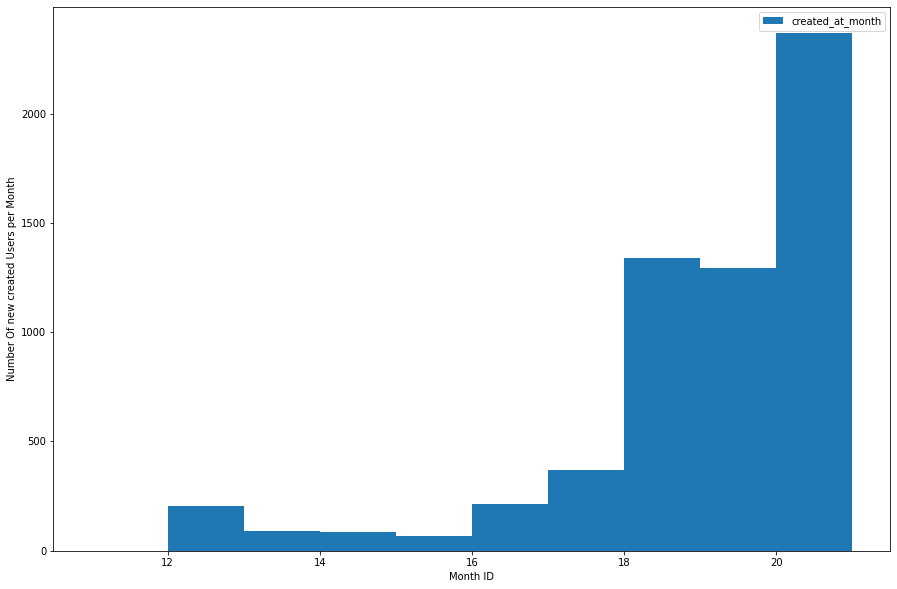

In [61]:
# 
minDatesPerUser = pd.DataFrame(df.groupby('user_id')['created_at_month'].min())
ax = minDatesPerUser.plot(kind = 'hist', figsize = (15, 10))
ax.set_ylabel("Number Of new created Users per Month")
ax.set_xlabel("Month ID")

In [62]:
df.head()

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0


**4. Porcentaje de las solicitudes Aceptadas por cada Mes**

In [75]:
pd.DataFrame(df.groupby('created_at_month')['status'].value_counts())

status
created_at_month status          
11               rejected       1
12               approved     179
                 rejected     110
13               rejected     112
                 approved     111
14               approved     112
                 rejected      72
15               approved     169
                 rejected      75
16               approved     323
                 rejected     150
17               approved     610
                 rejected     227
18               approved    1649
                 rejected     966
19               approved    2015
                 rejected    1586
20               approved    2026
                 rejected    1391
21               approved    2772
                 rejected    1449